In [171]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [172]:
df = pd.read_csv('credit_rating_prediction_dataset.csv')
df.head()

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [173]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1000 non-null   int64 
 1   checking_status         1000 non-null   object
 2   duration                1000 non-null   int64 
 3   credit_history          1000 non-null   object
 4   purpose                 1000 non-null   object
 5   credit_amount           1000 non-null   int64 
 6   savings_status          1000 non-null   object
 7   employment              1000 non-null   object
 8   installment_commitment  1000 non-null   int64 
 9   personal_status         1000 non-null   object
 10  other_parties           1000 non-null   object
 11  residence_since         1000 non-null   int64 
 12  property_magnitude      1000 non-null   object
 13  age                     1000 non-null   int64 
 14  other_payment_plans     1000 non-null   object
 15  housi

In [174]:
le = LabelEncoder()
one = OneHotEncoder()
X = df.drop('class', axis=1)
y = le.fit_transform(df['class'])

In [175]:
categorical_columns = X.select_dtypes(include='object').columns

In [176]:
numeric_columns = X.select_dtypes(include='int64').columns

In [177]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Handle missing values

In [179]:
# Feature Engineering Automation

num_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'median')), # Handling missing values
        ('scaler', StandardScaler()) # Feature scaling
    ]
)

cat_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')), # Handling missing values
        ('oneHotEncoder', OneHotEncoder()) #Handling categorical values
    ]
)

In [180]:
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numeric_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])

In [181]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['id', 'duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder())]),
                                 Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])

In [182]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [197]:
X_train

array([[-0.40888606,  0.09776381, -0.69772497, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.70713723, -0.75420842, -0.29775188, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.66564658,  0.01256659, -0.10517224, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.40978755, -0.49861675,  0.13726854, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91714656,  0.26815826, -0.50261615, ...,  0.        ,
         0.        ,  1.        ],
       [-1.60174233, -0.24302508, -0.40253254, ...,  0.        ,
         0.        ,  1.        ]])

In [184]:
# Perform logistic regression (classification)

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [185]:
# Make prediction on testing set
y_test_pred = model.predict(X_test)

In [186]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
print(comparison[0:15])
print(comparison[100:0])


    Actual  Predicted
0        0          1
1        1          0
2        1          1
3        0          0
4        0          0
5        1          0
6        1          1
7        1          1
8        1          1
9        1          1
10       0          0
11       1          1
12       1          1
13       1          1
14       1          1
Empty DataFrame
Columns: [Actual, Predicted]
Index: []


In [187]:
# Calculate accuracy (using accuracy_score for classification)
accuracy = accuracy_score(y_test,y_test_pred) 
print(f'Accuracy:{accuracy:.4f}')

Accuracy:0.7700


In [188]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[ 26  33]
 [ 13 128]]


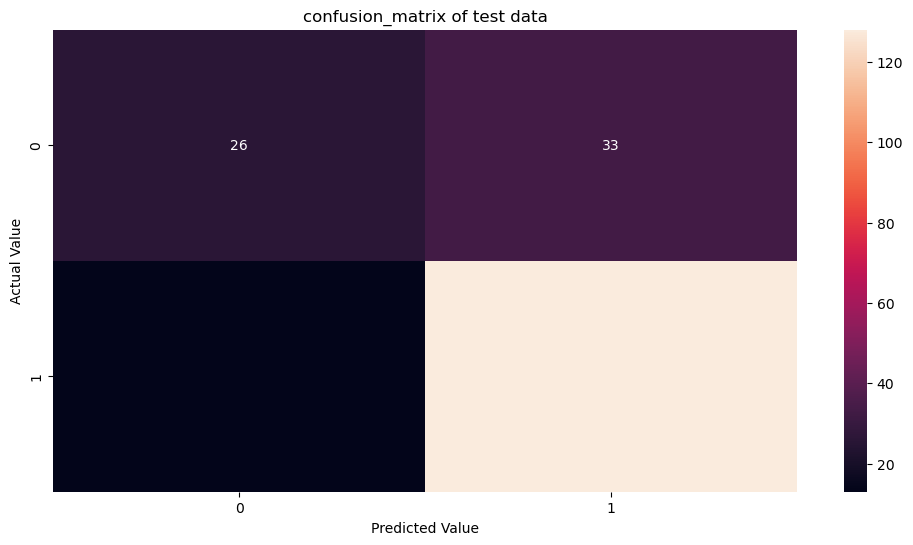

In [189]:
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot=True, fmt = 'd') 
plt.title("confusion_matrix of test data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")  
plt.show() 

In [190]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200



In [191]:
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]

In [192]:
recall = TP/(TP + FN)
print("Recall:", recall)

precision = TP/(TP + FP)
print("Precision:", precision)

specificity = TN/(TN + FP)
print("specificity:", specificity)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Recall: 0.9078014184397163
Precision: 0.7950310559006211
specificity: 0.4406779661016949
Accuracy: 0.77


In [193]:
# Saving Model (and anything else as pickle file)

import joblib
joblib.dump(model,'final_credit_rating_prediction.pkl')
joblib.dump(list(X.columns),'credit_rating_prediction_column_names.pkl')

['credit_rating_prediction_column_names.pkl']

In [194]:
# Loading model

col_names = joblib.load('credit_rating_prediction_column_names.pkl')
loaded_model = joblib.load('final_credit_rating_prediction.pkl')

In [219]:
# Create a dataframe (Otherwise we will get warning)

predict_df = pd.DataFrame(X_train[1:2,:])
print(predict_df)

         0         1         2         3         4         5         6   \
0  1.707137 -0.754208 -0.297752  0.919298  0.135313  1.272243 -0.708576   

         7    8    9   ...   52   53   54   55   56   57   58   59   60   61  
0 -0.411814  0.0  0.0  ...  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  

[1 rows x 62 columns]


In [220]:
prediction = loaded_model.predict(predict_df)
print(prediction)

[1]
